<left>
    <img src="https://papik.pro/uploads/posts/2021-09/1631528933_8-papik-pro-p-chashka-kofe-konturnii-risunok-8.jpg" width="300" alt="kpi logo"  />
</left>

# Topic: **Modeling the queue in a coffee shop**

# Content

* Formulation of the problem
* Theoretical information
* Implementation
   * Import the necessary libraries
   * Definition of global variables
   * Description of functions
   * Calculations
   * Display results
* Conclusions
* Used sources



# Formulation of the problem
It is necessary to build a queuing system in which:
1. the number of applications at the entrance is unlimited;
2. the emergence of new customers occurs at random intervals;
3. the length of the queue is limited;
4. customers are served by the rule "first come - first served";
5. the number of phases (stages) of service is 2 - cashiers and baristas (coffee makers);
6. number of channels at each stage 2 (two cashiers and two baristas);
7. service time at the cash desk stage and service time at the order execution stage depends on the order itself and the speed of the employee;




# Theoretical information
   
The subject of study of the theory of queues (the theory of queuing) is QS.

A queuing system (QS) is a system that services the requirements that come to it.

The purpose of queuing theory (queuing theory) is to form recommendations for the rational construction of QS, rational organization of their work and regulation of the flow of applications to ensure high efficiency of QS.


### Classification features of queuing systems

There are three main stages in queuing systems, which each application goes through:
appearance of the application at the entrance to the system;
passing the queue;
the service process after which the application leaves the system.
At each stage, certain characteristics are used that should be discussed before building mathematical models.


1) Entrance characteristics:
1. the number of applications at the entrance (population size);
2. mode of receipt of applications to the service system;
3. customer behavior.

2) Characteristics of the queue:
1. length;
2. service rule.

3) Characteristics of the service process:
1. configuration of the service system (number of channels and number of service phases);
2. service mode.


### QS scheme
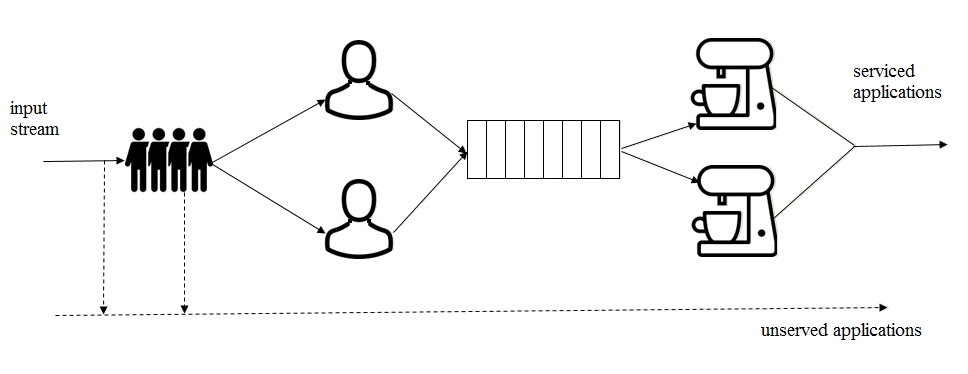

The appearance of new customers occurs at random intervals, so we will have a random flow of applications.

A flow of events is a sequence of homogeneous events that occur one after another over a random period of time. On the time axis, these events look as shown in the figure

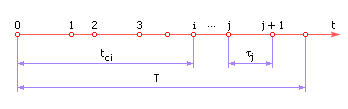

τj - interval between events (random variable);

tsi - the moment of the i-th event (calculated from t = 0);

T is the observation time.

An important value is the intensity of the flow of applications.

Flow intensity λ is the average number of events per unit time.

The flow intensity can be calculated experimentally by the formula: λ = N / T, where N is the number of events that occurred during the observation of T.
     The flow is stationary if the frequency of events λ (t) = const (t);
     It is accepted to take the Poisson flow as a sample of a stream in modeling.
     Poisson flow is an ordinary flow without aftereffect.
     The probability that m events will occur in the time interval (t0, t0 + τ) is determined by Poisson's law: 

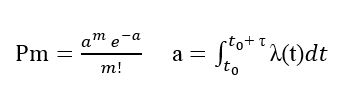

a is the Poisson parameter

The probability of occurrence of at least one event is calculated as follows:
Px = 1 - P0 = 1 - e ^ (- λτ)
To determine the interval between two random events, we express τ from this formula: τ = –1 / λ · Ln (r)

### Evaluation of the effectiveness of the QS
* Probability of service: Job. = No. / N

* System bandwidth: A = Nobs./T

* Probability of failure: Pdm. = Nref. / N

* Probability of employment of one channel: P1 = Tzan./T

* Probability of downtime of both channels: P * = T simple / T

* The average waiting time for the application in the queue

* The average time the application is in the system


#Realization


# Import required libraries

In [ ]:

import threading
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Definition of global variables

In [ ]:
flag = 0

interval_list = []
work_dict = {
'arrival_time':{},
'service_start_time':{},
'receiving_order_time':{},
'start_cooking_time':{},
'end_of_service':{},
'cashier':{},
'barista':{},
'refusal':{},
'left_the_queue':{}
}

number_of_people = 0
number_of_orders = 0
queue_pool = []
orders_pool = []

# --------------------------------------------------------------------------------------------------------------------------------------------------
drink_list = ['Espresso', 'Cappuccino', 'Latte', 'Americano', 'Moccochino', 'Cocoa', 'Cold brew', 'Black tea', 'Green tea', 'Fruit tea']
drink_probability = [0.25, 0.23, 0.17, 0.12, 0.1, 0.04, 0.005, 0.03, 0.03, 0.025]

food_list = ['Nothing', 'Cheesecake', 'Cake', 'Tiramisu', 'Donut', 'Cinnamon bun']
food_probability = [0.6, 0.2, 0.07, 0.05, 0.05, 0.03]
# --------------------------------------------------------------------------------------------------------------------------------------------------
drink_cook_time = {'Espresso': 1, 'Latte': 3, 'Americano': 1, 'Cappuccino': 3, 'Cold brew': 2,
                   'Moccochino': 3, 'Cocoa': 3, 'Black tea': 1, 'Green tea': 1, 'Fruit tea': 1}
food_cook_time = {'Tiramisu': 0.1, 'Cheesecake': 0.1, 'Cinnamon bun': 0.1, 'Cake': 0.1, 'Donut': 0.1, 'Nothing': 0}
# --------------------------------------------------------------------------------------------------------------------------------------------------
lock_a = threading.Lock()


#Definition of functions

Function for counting working time. After the end of working hours, the receipt of new applications (clients) stops

In [ ]:
def work_time(w_time):
    time.sleep(w_time)
    global flag
    flag = 1
    print('\n////////////////////////////////////////////////////////////////////////////////////\n')
    print('Finishing work !!!')
    thread_q.join()

Function to determine the random time interval between the receipt of two consecutive applications.

In [ ]:
def find_interval(lambd):
    # rand is a random variable evenly distributed over [0, 1]
    # lambd - Poisson intensity (N / T)
    rand = np.random.sample(1)[0]
    Sk = round(-1 / lambd * np.log(rand), 3)
    interval_list.append(Sk)
    return Sk

The function responsible for receiving a new application in the system. This function checks the length of the queue and adds a value to the queue list (does not add if the queue is too long).

In [ ]:
def new_client(N, T):
    global number_of_people
    global queue_pool
    global work_dict
    lambd = N / T
    dict_keys = list(work_dict.keys())[1:-2]
    time.sleep(find_interval(lambd))

    while flag == 0:
        if len(queue_pool) + len(queue_pool) <= 30:
            lock_a.acquire()
            queue_pool.append(number_of_people + 1)
            number_of_people += 1
            work_dict['refusal'][number_of_people] = False
            work_dict['left_the_queue'][number_of_people] = False
            work_dict['arrival_time'][number_of_people] = round(time.time() - start_time, 2)
            for key in dict_keys:
                work_dict[key][number_of_people] = 0
            print('-------------------------------------------------------------------------------------')
            print(round(time.time() - start_time, 2), 'New client: {}'.format(number_of_people))
            lock_a.release()
        else:
            number_of_people += 1
            work_dict['refusal'][number_of_people] = True
            work_dict['left_the_queue'][number_of_people] = False
            work_dict['arrival_time'][number_of_people] = round(time.time() - start_time, 2)
            for key in dict_keys:
                work_dict[key][number_of_people] = 0
            print('-------------------------------------------------------------------------------------')
            print('Too many people! The application was rejected!')

        time.sleep(find_interval(lambd))


Function for random selection of items in the order.

In [ ]:
def make_an_order():
    global number_of_orders
    drink_count = np.random.choice([1, 2, 3, 4, 5], size=1, p=[0.80, 0.1, 0.05, 0.03, 0.02])[0]
    drinks = np.random.choice(drink_list, size=drink_count, p=drink_probability)
    total_drink_cook_time = sum(drink_cook_time[el] for el in drinks)

    food = np.random.choice(food_list, size=drink_count, p=food_probability)
    total_food_cook_time = sum(food_cook_time[el] for el in food)

    new_order = {'drink': drinks, 'food': food, 'time': round(total_drink_cook_time + total_food_cook_time, 1)}
    return new_order


A function that simulates customer service at the cashier stage. This function moves the order from the queue list to the cooking order list.

In [ ]:
def work_of_cashiers(name, work_speed):
    global flag
    global queue_pool
    global orders_pool
    global number_of_orders
    global work_dict

    # global number_of_orders
    while flag == 0 or queue_pool != []:
        lock_a.acquire()
        if queue_pool != []:
            a = queue_pool[0]
            order = {a: make_an_order()}

            queue_pool.pop(0)
            work_dict['cashier'][a] = name
            service_start_time = round(time.time() - start_time, 2)
            work_dict['service_start_time'][a] = service_start_time
            print('-------------------------------------------------------------------------------------')
            print(service_start_time, 'Cashier {} start work with client {}'.format(name, a))
            lock_a.release()
            time.sleep(1+(len(order[a]['drink']) + sum(1 for el in order[a]['food'] if el != 'Nothing'))/work_speed)
            lock_a.acquire()

            orders_pool.append(order)
            number_of_orders += 1
            receiving_order_time = round(time.time() - start_time, 2)
            work_dict['receiving_order_time'][a] = receiving_order_time
            print('-------------------------------------------------------------------------------------')
            print(receiving_order_time,
                  'Cashier {}: order {} passed to baristas'.format(name, number_of_orders))
            print('Order {} made by client № {}'.format(number_of_orders, a))
            print('Order content: \n\tDrinks: {} \n\tDesserts: {} \n\tTotal cooking time: {}'.format(", ".join(order[a]['drink']),  ", ".join(order[a]['food']),  order[a]['time']))
            lock_a.release()
            time.sleep(0.05)
        else:
            lock_a.release()


A function that simulates customer service at the barista stage.

In [ ]:
def work_of_baristas(name, work_speed):
    global flag
    global orders_pool
    global queue_pool
    global work_dict
    while flag == 0 or queue_pool != [] or orders_pool != []:
        lock_a.acquire()
        if orders_pool != []:
            order = orders_pool[0]
            orders_pool.pop(0)
            a = list(order.keys())[0]
            work_dict['barista'][a] = name
            work_dict['start_cooking_time'][a] = round(time.time() - start_time, 2)
            b = order[a]
            lock_a.release()
            time.sleep(b['time']+len(b['drink'])/work_speed)
            end_of_service = round(time.time() - start_time, 2)
            work_dict['end_of_service'][a] = end_of_service
            print('-------------------------------------------------------------------------------------')
            print(end_of_service, 'Barista {}: order {} completed'.format(name, a))
        else:
            lock_a.release()
   

A function that simulates leaving the queue.

In [ ]:
def leave_the_queue(r_time):
    global queue_pool
    global work_dict
    time.sleep(r_time)
    lock_a.acquire()
    if len(queue_pool) >= 2:
        a = queue_pool[-1]
        work_dict['receiving_order_time'][a] = True
        queue_pool.pop(-1)
    lock_a.release()
   

Function that simulates the time of receipt of applications to the system throughout the simulation time. Returns a list whose values are the time of each request.

In [ ]:
def find_event_time(N, T):
    # rand is a random variable evenly distributed over [0, 1]
    #lambd - Poisson process intensity (N / T)
    lambd = N / T
    rand = np.random.sample(1)[0]
    Sk = round(-1 / lambd * np.log(rand), 3)
    event_time_list = [Sk]
    while True:
        rand = np.random.sample(1)[0]
        Sk = -1 / lambd * np.log(rand)
        el = round(Sk + event_time_list[-1], 3)
        if el < T:
            event_time_list.append(el)
        else:
            break
    return event_time_list

Function to display the time of receipt of applications to the system.

In [ ]:
def event_show(ev_time_list, T):
    ev_list_len = len(ev_time_list)
    # print(ev_list_len, ev_time_list)
    y = [0 for i in range(ev_list_len)]
    plt.figure(figsize=(10, 3))
    plt.plot([0, T], [0, 0], marker='|', color='r')
    plt.plot(ev_time_list, y, '-o', label='number of events: ' + str(ev_list_len))
    plt.title('λ = ' + str(round(N / T, 3)))
    plt.yticks([])
    plt.legend(fontsize=15)
    plt.show()

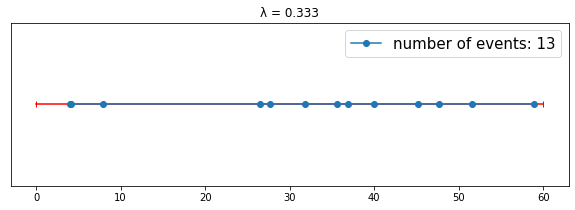

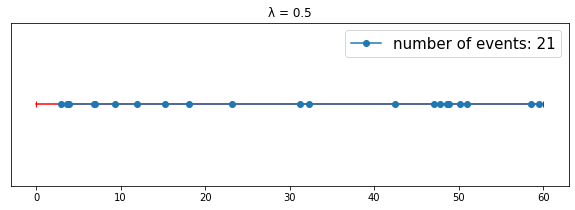

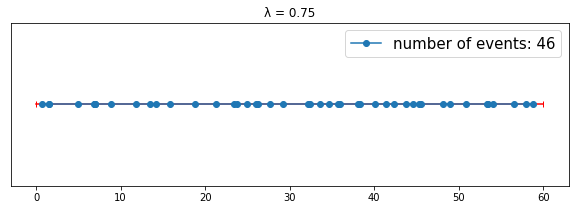

In [ ]:
N, T = 20, 60
event_time_list = find_event_time(N, T)
event_show(event_time_list, T)

N, T = 30, 60
event_time_list = find_event_time(N, T)
event_show(event_time_list, T)

N, T = 45, 60
event_time_list = find_event_time(N, T)
event_show(event_time_list, T)

#Calculation

In [ ]:
N = 30
T = 60
time_acceleration = 60


start_time = time.time()
thread_wt = threading.Thread(target=work_time, args=(T,))
thread_q = threading.Thread(target=new_client, args=(N, T))
thread_leave_q = threading.Thread(target=leave_the_queue, args=(np.random.uniform(10, T), ))

thread_k1 = threading.Thread(target=work_of_cashiers, args=("K1", 0.4*time_acceleration))
thread_k2 = threading.Thread(target=work_of_cashiers, args=("K2", 0.2*time_acceleration))
thread_b1 = threading.Thread(target=work_of_baristas, args=("B1", 0.2*time_acceleration))
thread_b2 = threading.Thread(target=work_of_baristas, args=("B2", 0.2*time_acceleration))

thread_wt.start()
thread_q.start()
thread_leave_q.start()

thread_k1.start()
thread_k2.start()
thread_b1.start()
thread_b2.start()
print('-------------------------------------------------------------------------------------')
thread_k1.join()
thread_k2.join()
thread_b1.join()
thread_b2.join()
thread_wt.join()

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
2.3 New client: 1
-------------------------------------------------------------------------------------
2.3 Cashier K1 start work with client 1
-------------------------------------------------------------------------------------
3.34 Cashier K1: order 1 passed to baristas
Order 1 made by client № 1
Order content: 
	Drinks: Espresso 
	Desserts: Nothing 
	Total cooking time: 1
-------------------------------------------------------------------------------------
4.43 Barista B2: order 1 completed
-------------------------------------------------------------------------------------
7.15 New client: 2
-------------------------------------------------------------------------------------
7.15 Cashier K1 start work with client 2
-------------------------------------------------------------------------------------
8.19 Cashi

In [ ]:
df0 = pd.DataFrame(work_dict)
df0.to_csv(str(N)+'_'+str(T)+'out.csv')
df = df0[(df0.refusal == False) & (df0.left_the_queue == False)]
df1 = pd.DataFrame()

arr = np.array([df['service_start_time'].to_list(), df['receiving_order_time'].to_list()]).transpose()

arr_len = len(arr)
res = []
for i in range(arr_len-1):
    first = arr[i]
    second = arr[i+1]
    if first[0] > second[0]:
        res.append([second[1], first[0]])
    elif first[1] < second[0]:
        res.append([first[1], second[0]])

# час простою обох касирів
downtime2 = sum(el[1]-el[0] for el in res)

res = []
for i in range(arr_len-1):
    first = arr[i]
    second = arr[i+1]
    if first[0] <= second[1] and first[1] >= second[0]:
        res.append([second[0], first[1]])

# час роботи обох касирів
w_time2 = sum(el[1]-el[0] for el in res)


df1['time_in_queue'] = df['service_start_time'] - df['arrival_time']
df1['service_time'] = df['end_of_service'] - df['arrival_time']


#Display results

In [ ]:

df0.head(10)

,arrival_time,service_start_time,receiving_order_time,start_cooking_time,end_of_service,cashier,barista,refusal,left_the_queue
1,2.36,2.36,3.53,3.53,4.72,K2,B2,False,False
2,2.89,2.89,3.94,3.94,5.02,K1,B1,False,False
3,3.63,3.63,4.73,4.73,7.82,K2,B2,False,False
4,6.40,6.40,7.49,7.49,10.68,K1,B1,False,False
5,7.72,7.72,8.80,8.80,9.99,K1,B2,False,False
6,11.32,11.32,12.99,12.99,26.72,K2,B2,False,False
7,14.43,14.43,15.52,15.52,16.60,K2,B1,False,False
8,17.45,17.45,18.50,18.50,19.59,K1,B1,False,False
9,20.33,20.34,21.43,21.43,24.51,K2,B1,False,False
10,20.46,20.46,21.51,24.52,27.61,K1,B1,False,False


In [ ]:

print('\n-------------------------------------------------------------------------------------')
print(df1.describe())
print('\n-------------------------------------------------------------------------------------')
print('Probability of service:', round(number_of_orders / number_of_people * 100, 2), '%')
print('System bandwidth:', round(number_of_orders / T, 2))
print('Probability of failure:', round((number_of_people - number_of_orders) / number_of_people * 100, 2), '%')
print('Probability of employment of one channel:', round((T - downtime2 - w_time2) / T * 100, 2), '%')
print('Probability of downtime of both channels:', round(downtime2 / T * 100, 2), '%')
print('Average waiting time for the application in the queue:', round(df1['time_in_queue'].mean(), 2))
print('Average time spent in the system:', round(df1['service_time'].mean(), 2))
print('-------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------
       time_in_queue  service_time
count      38.000000     38.000000
mean        0.095263      7.097368
std         0.204394      3.531484
min         0.000000      2.130000
25%         0.000000      4.427500
50%         0.000000      6.530000
75%         0.010000      9.007500
max         0.900000     17.120000

-------------------------------------------------------------------------------------
Probability of service: 100.0 %
System bandwidth: 0.63
Probability of failure: 0.0 %
Probability of employment of one channel: 36.7 %
Probability of downtime of both channels: 44.85 %
Average waiting time for the application in the queue: 0.1
Average time spent in the system: 7.1
-------------------------------------------------------------------------------------


#Conclusions

In the course of this work, mathematical modeling of queues was studied on the example of modeling a queue in a coffee shop. For this model, the main parameters were the number of channels at each stage of service and the number of requests that arrive in the system for a certain period of time. Simulating the work of a coffee shop with two cashiers, two baristas with an intensity of 30 customers per hour, you can see that the waiting time in the queue is very short compared to the waiting time for the order. This result is quite expected, because cashiers need much less time to receive an order than baristas to prepare it. This problem can be solved by increasing the number of coffee makers, which will significantly increase the speed of baristas.